In [1]:
import Pkg; 
Pkg.add("BenchmarkTools")
Pkg.add("Plots")
Pkg.add("OrderedCollections")
Pkg.add("Latexify")



    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
include("./modules.jl")
using LinearAlgebra
using Printf
using Plots
using .MakeGraph
using .BinaryBasisFermions
using .CouplingConstants
using .Operators

Operator algebra in unresstricted Hilbert space

In [17]:
# norb - number of sites/orbitals
# n - number of electrons
norb=2
base, index = BaseGen(2*norb)
base  # basis in the entire Fock space

16-element Vector{BitVector}:
 [0, 0, 0, 0]
 [0, 0, 0, 1]
 [0, 0, 1, 0]
 [0, 0, 1, 1]
 [0, 1, 0, 0]
 [0, 1, 0, 1]
 [0, 1, 1, 0]
 [0, 1, 1, 1]
 [1, 0, 0, 0]
 [1, 0, 0, 1]
 [1, 0, 1, 0]
 [1, 0, 1, 1]
 [1, 1, 0, 0]
 [1, 1, 0, 1]
 [1, 1, 1, 0]
 [1, 1, 1, 1]

In [40]:
function Cgen(base::Vector{BitVector},index::Dict{BitVector, Int64},flavor::Int)  
    bsize=length(base)
    if length(index)!=bsize  
        return "incosistent basis map" 
    end
    C=zeros(Int,bsize,bsize)
    for i in 1:bsize
        s=base[i]
        state=copy(s)
        sgn = c!(flavor,state)
        j=index[state]
        C[j,i] +=sgn
    end
    return C
end

function Cdaggen(base::Vector{BitVector},index::Dict{BitVector, Int64},flavor::Int)
    bsize=length(base)
    if length(index)!=bsize  
        return "incosistent basis map" 
    end
    C=zeros(Int,bsize,bsize)
    for i in 1:bsize
        s=base[i]
        state=copy(s)
        sgn = cdag!(flavor,state)
        j=index[state]
        C[j,i] +=sgn
    end
    return C
end

anti(A,B)=A*B+B*A
com(A,B)=A*B-B*A

com (generic function with 1 method)

In [25]:
c2=Cgen(base,index,2)  # anihiliation operator for flavor 2

16×16 Matrix{Int64}:
 0  0  0  0  1   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0  -1   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0  -1  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  1  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  1   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0  -1   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0  -1  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  1
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0
 0  0  0  0  0   0   0  0  0  0  0  0  0   0   0  0

In [20]:
c1=Cgen(base,index,1)  # anihiliation operator for flavor 1

16×16 Matrix{Int64}:
 0  0  0  0  0  0  0  0  1   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0  -1   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0  -1  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  1   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0  -1  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  1  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  1   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0  -1
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0
 0  0  0  0  0  0  0  0  0   0   0  0   0  0  0   0

In [21]:
cdag2=Cdaggen(base,index,2)  # creation operator for flavor 2

16×16 Matrix{Int64}:
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 1   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0  -1   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0  -1  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  1  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  1   0   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0  -1   0  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0  -1  0  0  0  0  0
 0   0   0  0  0  0  0  0  0   0   0  1  0  0  0  0

In [26]:
c2'-cdag2

16×16 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [29]:
c2*c1 # check anticommuation c1*c2

16×16 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  -1   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0  -1   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0  -1   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0  -1
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0

In [30]:
c2'*c2+c2*c2'  # {cdag,c}=I

16×16 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1

Now we perform calculations in a restricted Hilbert space of 2 electrons

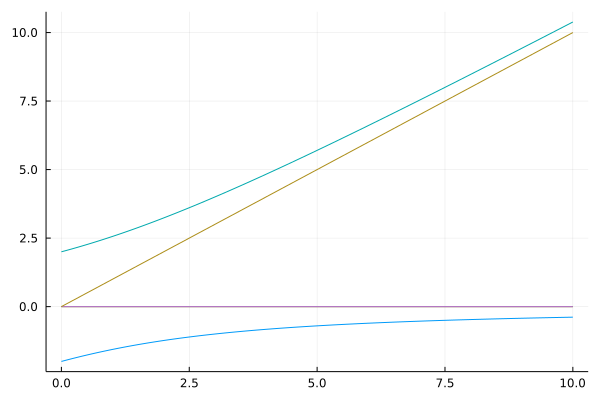

In [31]:
# norb - number of sites/orbitals
# n - number of electrons
norb=2
n=2
base, index = BaseGen(2*norb,(occbin,n)) 

graph=loopNN(norb)
pop!.(graph)     #open boundaries

h1elements=Graph2Hop(graph,norb,1.)
h2elements=ChainU(norb,1.)

Ham(u)=H1gen(h1elements,base,index)+u*H2gen(h2elements,base,index)

x=0:0.1:10                 # spectrum as a function of 0<delta<0.1
function spectrum(x::Real)
# y=real.(eigvals(H1gen(h1elements,base,index)+x*H2gen(h2elements,base,index)))
 y=real.(eigvals(Ham(x)))
end
y=reduce(hcat,map(spectrum,x))'
plot(x,y,legend = false)

Spin operators and their algebra

In [39]:
S1=[H1gen(Sx(norb,1),base,index),-im*H1gen(iSy(norb,1),base,index),H1gen(Sz(norb,1),base,index)]
S2=[H1gen(Sx(norb,2),base,index),-im*H1gen(iSy(norb,2),base,index),H1gen(Sz(norb,2),base,index)]
# Spin [Sx,Sy,Sz] on sites 1 and 2
S1[1]

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im   0.0+0.0im  0.5+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im  -0.5+0.0im
 0.5+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im  0.0+0.0im  -0.5+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im

Check the commutation rules $[S^x,S^y]=iS^z$, $[S^y,S^z]=iS^x$, $[S^z,S^x]=iS^y$

In [51]:
com(S1[3],S1[1])-im*S1[2]

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

In [52]:
com(S1[3],S2[1]) # spin operators on different sites commute

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

Spin spin correlations $\langle g|S^x_1S^x_2|g\rangle$

In [62]:
gs(H)=eigvecs(H)[:,1]
O=[S1[1]*S2[1],S1[2]*S2[2],S1[3]*S2[3]];

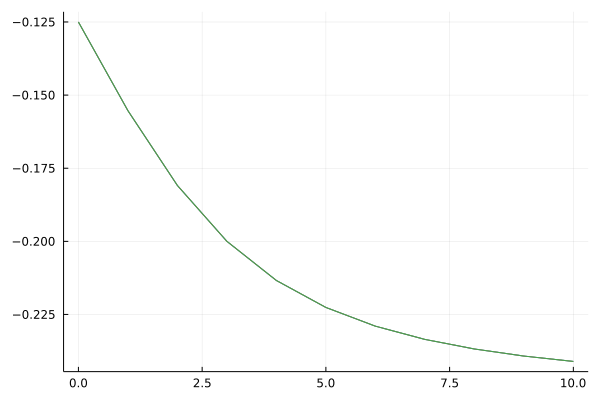

In [63]:
x=0:1:10                 # spectrum as a function of 0<delta<0.1
function mean(x::Real)
      v = gs(Ham(x))
      y = map(A->real.(v'*A*v),O)
end
y=reduce(hcat,map(mean,x))'
plot(x,y,legend = false)

Total spin $\mathbf{S}=\mathbf{S}_1+\mathbf{S}_2$ and its square $S^2=\mathbf{S}.\mathbf{S}$ with eigenvalues $S(S+1)$.

In [67]:
S=S1+S2                            
SS=S[1]*S[1]+S[2]*S[2]+S[3]*S[3]

6×6 Matrix{ComplexF64}:
 2.0+0.0im  0.0+0.0im   0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im   1.0+0.0im  -1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  -1.0+0.0im   1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im   0.0+0.0im   0.0+0.0im  0.0+0.0im  2.0+0.0im

In [69]:
eigvals(SS)

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 2.0
 2.0
 2.0

$[S^x_1,H]\neq 0$ local spin is NOT a conserved quantity.

In [75]:
com(S1[1],Ham(0.2))

6×6 Matrix{ComplexF64}:
  0.0+0.0im   0.5+0.0im  0.0+0.0im  0.0+0.0im   0.5+0.0im  0.0+0.0im
 -0.5+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im  0.5+0.0im
  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im
  0.0+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im  0.0+0.0im
 -0.5+0.0im   0.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im  0.5+0.0im
  0.0+0.0im  -0.5+0.0im  0.0+0.0im  0.0+0.0im  -0.5+0.0im  0.0+0.0im

$[S^x,H]= 0$ total spin IS a conserved quantity.

In [76]:
com(S[1],Ham(0.2))

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

$[S^x,S^2]= 0$ spin operators commute with the spin magnitude.

In [78]:
com(S[1],SS)

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

$[S^2,H]= 0$ total spin IS a conserved quantity.

In [79]:
com(SS,Ham(0.2))

6×6 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

We can build common eigenstates of $S^x$, $S^2$ and $H$. Typically one would use $S^z$. Using $S^2$ as a good quantum number to construct a basis is not very practical since $S^2$ is not diagonal in the occupation number basis.